# Problam Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [701]:
# Import Libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [702]:
#load dataset of loan 


loan_df = pd.read_csv('loan_prediction.csv')

loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [703]:
#all information about dataset

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [704]:
# Describe about data.

loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [705]:
# In this data set we are seeing that some of null values are present.

#let's chack null values.


loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Some of the columns have null values. first chack all information about columns then fill null values.

In [706]:
# Loan_ID is not the importent feature . have to drop it.

loan_df = loan_df.drop(columns=['Loan_ID'])

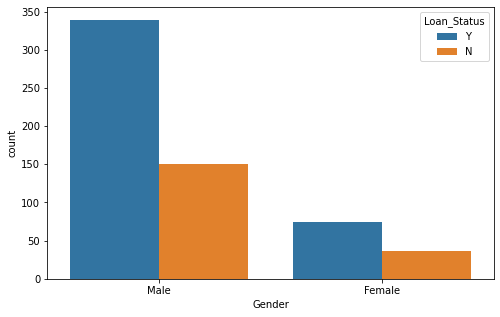

['Male' 'Female' nan]


In [707]:
# now chaking about Gander.

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x="Gender",hue='Loan_Status')
plt.show()


print(loan_df['Gender'].unique())

In [708]:
# Fill null values in Gander column.


loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])



In [709]:
loan_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

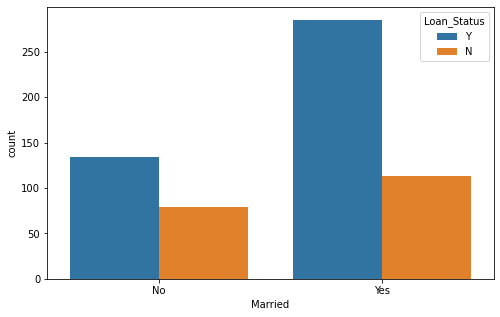

This column has null values: 
  3


In [710]:
#Married column

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Married',hue='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Married'].isna().sum())

In [711]:
#Fill null values 


loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])

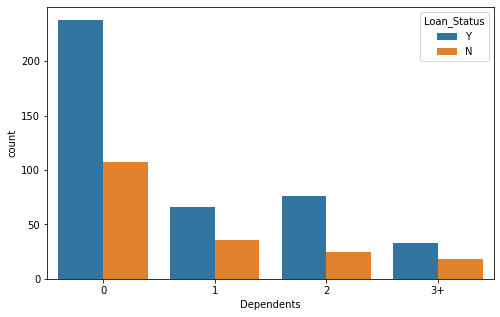

This column has null values: 
  15


In [712]:
#Dependent column

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Dependents',hue='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Dependents'].isna().sum())

In [713]:
#Fill null values 


loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])

In [714]:
#after fill the null we have to convert this column into numeric because  it has numeric values.

#First we have to replace '3+' to 4 .

#i cancider that 3+ means 4.

loan_df['Dependents'] = loan_df['Dependents'].replace({'3+':4})


In [715]:
# now convert onjective to numerical 


dependent = pd.to_numeric(loan_df['Dependents'])


In [716]:
# lets Drop old column

loan_df = loan_df.drop(columns=['Dependents'])

In [717]:
#join numerical column


loan_df = loan_df.join(dependent)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


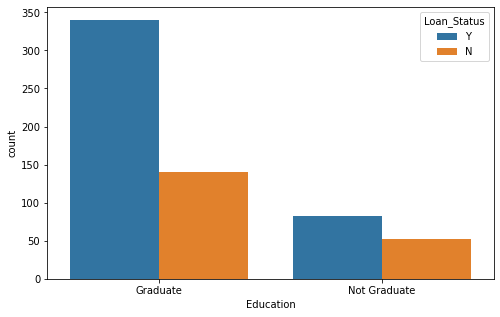

This column has null values: 
  0


In [718]:
#Education column

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Education',hue='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Education'].isna().sum())

In [719]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

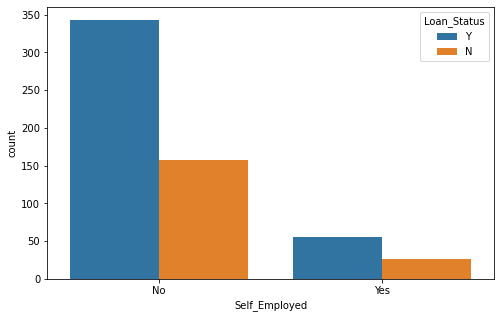

This column has null values: 
  32


In [720]:
#Self Employed column

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Self_Employed',hue='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Self_Employed'].isna().sum())

In [721]:
#fill null values 

loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

In [722]:
loan_df.isna().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Dependents            0
dtype: int64

In [723]:
loan_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [724]:
loan_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [725]:
# fill null in these columns.


loan_df['LoanAmount'] =  loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())

loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])

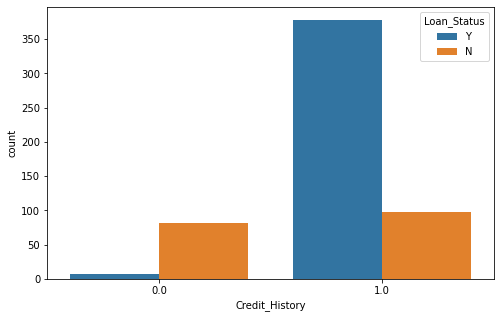

This column has null values: 
  50


In [726]:
##Self Employed column

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Credit_History',hue='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Credit_History'].isna().sum())

In [727]:
#fill null values in this column

loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

In [728]:
#Now chacking null again

loan_df.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependents           0
dtype: int64

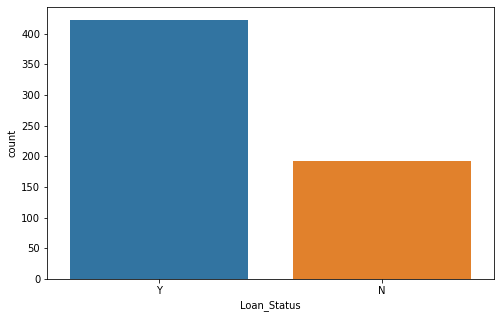

This column has null values: 
  0


In [729]:
#let's convert target value objective to numerical

plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(data=loan_df,x='Loan_Status')
plt.show()



print("This column has null values: \n ",loan_df['Loan_Status'].isna().sum())

In [730]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y':1,"N":0})

#### Null values have been filed.

In [731]:
# Let's check the "0" value counts if any...

for column in loan_df:
    print(column+" = "+str(loan_df[loan_df[column]==0].shape[0]))

Gender = 0
Married = 0
Education = 0
Self_Employed = 0
ApplicantIncome = 0
CoapplicantIncome = 273
LoanAmount = 0
Loan_Amount_Term = 0
Credit_History = 89
Property_Area = 0
Loan_Status = 192
Dependents = 360


In [732]:
# we can see that CoapplicationIncome has high valumn of zero.

#let's chack is this column ins importent for target column

loan_df.corrwith(loan_df.Loan_Status).sort_values(ascending=False)


Loan_Status          1.000000
Credit_History       0.540556
Dependents           0.002474
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
dtype: float64

In [733]:
#clearly seeing that Coapplication column is very low correlative with target column. so we have to drop  it.


loan_df = loan_df.drop(columns=['CoapplicantIncome'])

In [734]:
loan_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,Male,No,Graduate,No,5849,146.412162,360.0,1.0,Urban,1,0
1,Male,Yes,Graduate,No,4583,128.000000,360.0,1.0,Rural,0,1
2,Male,Yes,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,1,0
3,Male,Yes,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,1,0
4,Male,No,Graduate,No,6000,141.000000,360.0,1.0,Urban,1,0


## Chacking Correlation 

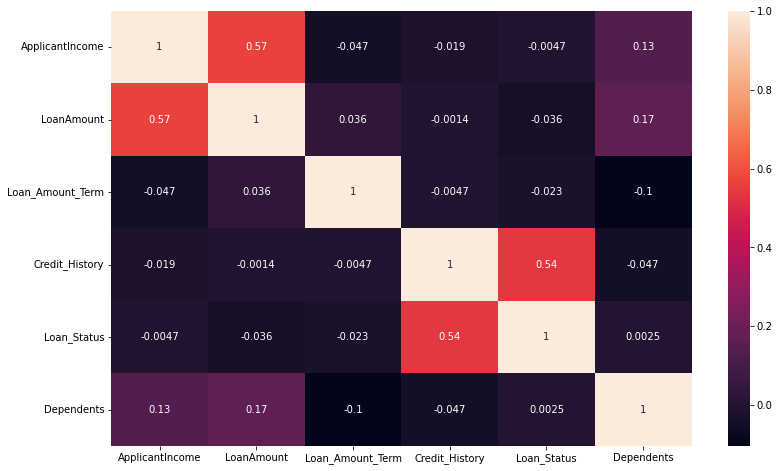

In [735]:
#using heatmap

plt.figure(figsize=(13,8))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

# Data distribution

## First saparate data into continues, catagorical and target.

In [736]:
feature_continues =loan_df[['ApplicantIncome','LoanAmount']].copy()

feature_catagorical = loan_df.drop(columns=['ApplicantIncome','LoanAmount','Loan_Status'])

target = loan_df['Loan_Status']

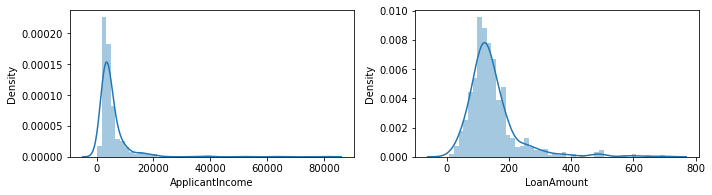

In [737]:
#Data distribution (distplot)

plt.figure(figsize=(10,5),facecolor='white')
plot=1
for column in feature_continues:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.distplot(feature_continues[column])
    plot+=1
plt.tight_layout()

In [738]:
# chaking skewness

feature_continues.skew()

ApplicantIncome    6.539513
LoanAmount         2.726601
dtype: float64

In [739]:
# skewness is present hear so we have to use power tranformation

from sklearn.preprocessing import PowerTransformer

power_transfer = PowerTransformer()

In [740]:
new_continues_feature = power_transfer.fit_transform(feature_continues)

feature_continues = feature_continues.drop(columns=['ApplicantIncome','LoanAmount'])

feature_continues = pd.DataFrame(new_continues_feature,columns=['ApplicantIncome','LoanAmount'])

feature_continues.skew()

ApplicantIncome   -0.092946
LoanAmount         0.024376
dtype: float64

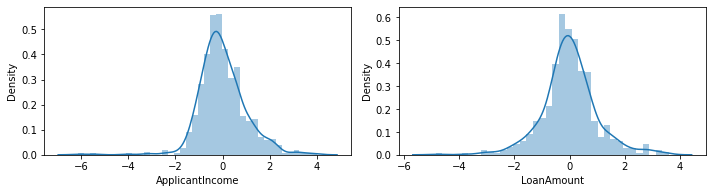

In [741]:
#Data distribution (distplot)

plt.figure(figsize=(10,5),facecolor='white')
plot=1
for column in feature_continues:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.distplot(feature_continues[column])
    plot+=1
plt.tight_layout()

### Skewness has been gone.

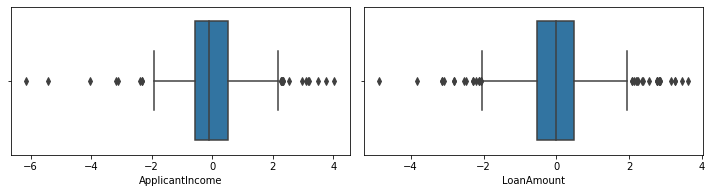

In [742]:
#chacking outliers

plt.figure(figsize=(10,5),facecolor='white')
plot=1
for column in feature_continues:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.boxplot(feature_continues[column])
        plt.xlabel(column)
    plot+=1
plt.tight_layout()


In [743]:
#Outliers are present so we have to use some of technic for remove outliers.

# using z-socre method

from scipy.stats import zscore

z =np.abs(zscore(feature_continues))

threshold = 3

print(np.where(z>3))




(array([ 14,  94, 130, 133, 155, 155, 171, 171, 185, 188, 216, 333, 369,
       409, 443, 468, 500, 555, 561, 568, 600], dtype=int64), array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64))


In [744]:
# drop that index from all orignal data

feature_continues = feature_continues.drop(index=[ 14,  94, 130, 133, 155, 155, 171, 171, 185, 188, 216, 333, 369,409, 443, 468, 500, 555, 561, 568, 600])
feature_catagorical  = feature_catagorical.drop(index=[14,  94, 130, 133, 155, 155, 171, 171, 185, 188, 216, 333, 369,409, 443, 468, 500, 555, 561, 568, 600])
target = target.drop(index=[14,  94, 130, 133, 155, 155, 171, 171, 185, 188, 216, 333, 369,409, 443, 468, 500, 555, 561, 568, 600])

### Now data looks good.


In [745]:
final_feature = feature_continues.join([feature_catagorical])
final_feature.head()

,ApplicantIncome,LoanAmount,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,0.544331,0.235387,Male,No,Graduate,No,360.0,1.0,Urban,0
1,0.170974,-0.037659,Male,Yes,Graduate,No,360.0,1.0,Rural,1
2,-0.499955,-1.346305,Male,Yes,Graduate,Yes,360.0,1.0,Urban,0
3,-0.743873,-0.167886,Male,Yes,Not Graduate,No,360.0,1.0,Urban,0
4,0.582817,0.158610,Male,No,Graduate,No,360.0,1.0,Urban,0


In [746]:
#shape of both df


print("Shape of features df is:\n",final_feature.shape)

print("shape of Target df is:\n",target.shape)

Shape of features df is:
 (595, 10)
shape of Target df is:
 (595,)


In [747]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    object 
 3   Married           595 non-null    object 
 4   Education         595 non-null    object 
 5   Self_Employed     595 non-null    object 
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Property_Area     595 non-null    object 
 9   Dependents        595 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 67.3+ KB


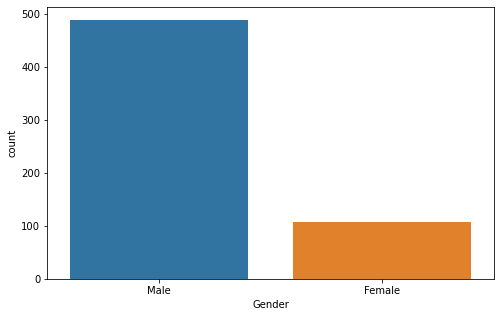

In [748]:
#count plot for gander

plt.figure(figsize=(8,5))
sns.countplot(final_feature['Gender'])
plt.show()

In [749]:
# convert Male = 0 and Female = 1

final_feature['Gender'] = final_feature['Gender'].replace({"Male":0,"Female":1})

In [750]:
#counting and chacking values

final_feature['Gender'].value_counts()

0    488
1    107
Name: Gender, dtype: int64

In [751]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    int64  
 3   Married           595 non-null    object 
 4   Education         595 non-null    object 
 5   Self_Employed     595 non-null    object 
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Property_Area     595 non-null    object 
 9   Dependents        595 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 67.3+ KB


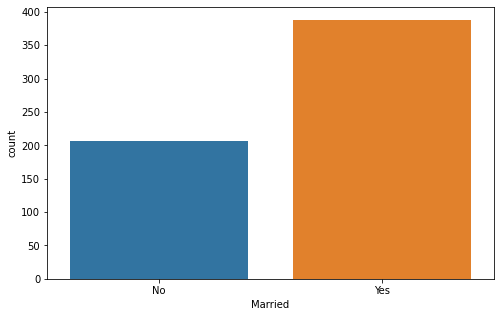

In [752]:
#count plot for married

plt.figure(figsize=(8,5))
sns.countplot(final_feature['Married'])
plt.show()

In [753]:
#convert No = 0, Yes = 1

final_feature['Married'] = final_feature['Married'].replace({"No":0,"Yes":1})

final_feature['Married'].value_counts()

1    388
0    207
Name: Married, dtype: int64

In [754]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    int64  
 3   Married           595 non-null    int64  
 4   Education         595 non-null    object 
 5   Self_Employed     595 non-null    object 
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Property_Area     595 non-null    object 
 9   Dependents        595 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 67.3+ KB


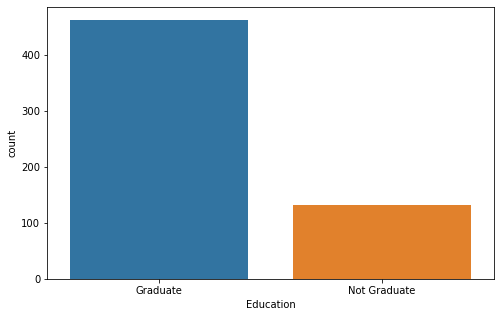

In [755]:
#count plot for Education

plt.figure(figsize=(8,5))
sns.countplot(final_feature['Education'])
plt.show()

In [756]:
#convert Graduate = 1 and Not Graduate = 0

final_feature['Education'] = final_feature['Education'].replace({"Graduate":1,"Not Graduate":0})

final_feature['Education'].value_counts()

1    463
0    132
Name: Education, dtype: int64

In [757]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    int64  
 3   Married           595 non-null    int64  
 4   Education         595 non-null    int64  
 5   Self_Employed     595 non-null    object 
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Property_Area     595 non-null    object 
 9   Dependents        595 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 67.3+ KB


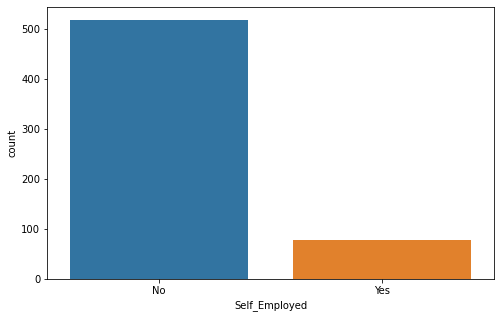

In [758]:
#count plot for Self_Employed

plt.figure(figsize=(8,5))
sns.countplot(final_feature['Self_Employed'])
plt.show()

In [759]:
#convert No=0,Yes = 1

final_feature['Self_Employed'] = final_feature['Self_Employed'].replace({"No":0,"Yes":1})

final_feature['Self_Employed'].value_counts()

0    518
1     77
Name: Self_Employed, dtype: int64

In [760]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    int64  
 3   Married           595 non-null    int64  
 4   Education         595 non-null    int64  
 5   Self_Employed     595 non-null    int64  
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Property_Area     595 non-null    object 
 9   Dependents        595 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 67.3+ KB


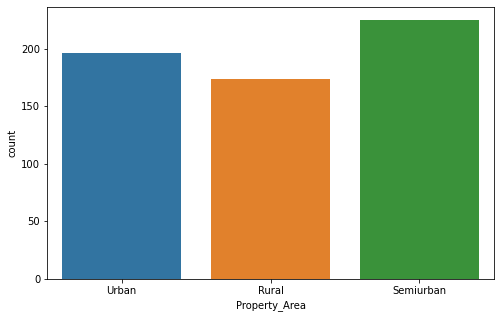

In [761]:
#count plot for Property Area

plt.figure(figsize=(8,5))
sns.countplot(final_feature['Property_Area'])
plt.show()

In [762]:
feature_dumm = final_feature['Property_Area']

In [763]:
#get_dummies for convert objective to numerical

feature_dumm = final_feature['Property_Area']

feature_dumm = pd.get_dummies(feature_dumm)

final_feature = final_feature.drop(columns=['Property_Area'])

final_feature = final_feature.join(feature_dumm)

final_feature.head()

,ApplicantIncome,LoanAmount,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Dependents,Rural,Semiurban,Urban
0,0.544331,0.235387,0,0,1,0,360.0,1.0,0,0,0,1
1,0.170974,-0.037659,0,1,1,0,360.0,1.0,1,1,0,0
2,-0.499955,-1.346305,0,1,1,1,360.0,1.0,0,0,0,1
3,-0.743873,-0.167886,0,1,0,0,360.0,1.0,0,0,0,1
4,0.582817,0.158610,0,0,1,0,360.0,1.0,0,0,0,1


In [764]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   595 non-null    float64
 1   LoanAmount        595 non-null    float64
 2   Gender            595 non-null    int64  
 3   Married           595 non-null    int64  
 4   Education         595 non-null    int64  
 5   Self_Employed     595 non-null    int64  
 6   Loan_Amount_Term  595 non-null    float64
 7   Credit_History    595 non-null    float64
 8   Dependents        595 non-null    int64  
 9   Rural             595 non-null    uint8  
 10  Semiurban         595 non-null    uint8  
 11  Urban             595 non-null    uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 64.4 KB


In [765]:
# now deal with target values

target.value_counts()

1    408
0    187
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

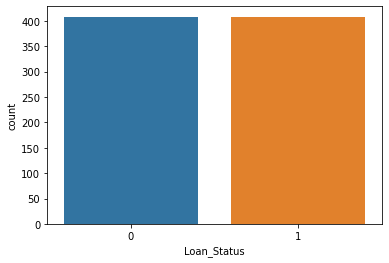

In [766]:
# This is imbalanced data set so we have to balace this data.

from imblearn.over_sampling import SMOTE



smt = SMOTE()
final_feature, target = smt.fit_resample(final_feature, target)



sns.countplot(target)

In [767]:
final_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ApplicantIncome   816 non-null    float64
 1   LoanAmount        816 non-null    float64
 2   Gender            816 non-null    int64  
 3   Married           816 non-null    int64  
 4   Education         816 non-null    int64  
 5   Self_Employed     816 non-null    int64  
 6   Loan_Amount_Term  816 non-null    float64
 7   Credit_History    816 non-null    float64
 8   Dependents        816 non-null    int64  
 9   Rural             816 non-null    uint8  
 10  Semiurban         816 non-null    uint8  
 11  Urban             816 non-null    uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 59.9 KB


In [768]:
#chack count


target.value_counts()

1    408
0    408
Name: Loan_Status, dtype: int64

In [769]:
#chack feature shap


final_feature.shape

(816, 12)

In [770]:
#chack target shap

target.shape

(816,)

# Scaling data set

In [771]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [772]:
final_feature_scaled = std.fit_transform(final_feature)

final_feature_scaled

array([[ 0.68844829,  0.27422259, -0.45508306, ..., -0.63598352,
        -0.71687841,  1.41812204],
       [ 0.23357137, -0.04174483, -0.45508306, ...,  1.57236778,
        -0.71687841, -0.70515793],
       [-0.58384926, -1.55610742, -0.45508306, ..., -0.63598352,
        -0.71687841,  1.41812204],
       ...,
       [ 0.72328153,  1.60060801, -0.45508306, ..., -0.63598352,
        -0.71687841,  1.41812204],
       [-0.37552363,  0.63584397, -0.45508306, ...,  1.57236778,
        -0.71687841, -0.70515793],
       [ 0.48040005,  0.88680803, -0.45508306, ...,  1.57236778,
        -0.71687841, -0.70515793]])

In [773]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [774]:
def model(mod):
    max_auc = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(final_feature_scaled,target,test_size = 0.25, random_state =i)
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        auc_scor = accuracy_score(y_test,y_pred)
        if auc_scor>max_auc:
            max_auc=auc_scor
            max_state=i
    print("Best Accuracy Score corresponding to ",max_state,"is ",auc_scor)
    print("Classifiation Report-->\n\n",classification_report(y_test,y_pred))


In [791]:
def Modal_all(mob):
    x_train,x_test,y_train,y_test = train_test_split(final_feature_scaled,target,random_state=80,test_size=0.25)
    mob.fit(x_train,y_train)
    y_pre = mob.predict(x_test)
    
    print("Accuracy score of this modal is :\n\n",accuracy_score(y_test,y_pre)*100)
    
    print("Confusion matrix of this modal is :\n\n",confusion_matrix(y_test,y_pre))
    
    print("Classification report of this modal is :\n\n",classification_report(y_test,y_pre))
    
    print("roc_auc_score :\n\n",roc_auc_score(y_test,y_pre)*100)
    
    print("Cross_values_score :\n\n ",cross_val_score(mob,final_feature_scaled,target,cv=3).mean()*100)

# LogisticRegression

In [792]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model(log_reg)

Best Accuracy Score corresponding to  146 is  0.7156862745098039
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.85      0.59      0.70       113
           1       0.63      0.87      0.73        91

    accuracy                           0.72       204
   macro avg       0.74      0.73      0.71       204
weighted avg       0.75      0.72      0.71       204



# RandomForestClassifier

In [793]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
Modal_all(rand_class)

Accuracy score of this modal is :

 82.35294117647058
Confusion matrix of this modal is :

 [[82 21]
 [15 86]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.85      0.80      0.82       103
           1       0.80      0.85      0.83       101

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82       204
weighted avg       0.82      0.82      0.82       204

roc_auc_score :

 82.38008266846101
Cross_values_score :

  78.55392156862744


# AdaBoostClassifier

In [778]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier()
Modal_all(ada_class)

Accuracy score of this modal is :

 77.45098039215686
Confusion matrix of this modal is :

 [[75 26]
 [20 83]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.79      0.74      0.77       101
           1       0.76      0.81      0.78       103

    accuracy                           0.77       204
   macro avg       0.78      0.77      0.77       204
weighted avg       0.78      0.77      0.77       204

roc_auc_score :

 77.41997500720946
Cross_values_score :

  72.67156862745098


# BaggingClassifier

In [779]:
from sklearn.ensemble import BaggingClassifier
beg_class = BaggingClassifier()
Modal_all(beg_class)

Accuracy score of this modal is :

 78.43137254901961
Confusion matrix of this modal is :

 [[85 16]
 [28 75]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.75      0.84      0.79       101
           1       0.82      0.73      0.77       103

    accuracy                           0.78       204
   macro avg       0.79      0.78      0.78       204
weighted avg       0.79      0.78      0.78       204

roc_auc_score :

 78.48697491108335
Cross_values_score :

  73.8970588235294


# GradientBoostingClassifier

In [780]:
from sklearn.ensemble import GradientBoostingClassifier
gbd_class = GradientBoostingClassifier()
Modal_all(gbd_class)

Accuracy score of this modal is :

 77.45098039215686
Confusion matrix of this modal is :

 [[72 29]
 [17 86]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.81      0.71      0.76       101
           1       0.75      0.83      0.79       103

    accuracy                           0.77       204
   macro avg       0.78      0.77      0.77       204
weighted avg       0.78      0.77      0.77       204

roc_auc_score :

 77.39113717196962
Cross_values_score :

  73.40686274509804


# DecisionTreeClassifier

In [781]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
Modal_all(d_tree)

Accuracy score of this modal is :

 73.52941176470588
Confusion matrix of this modal is :

 [[77 24]
 [30 73]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.72      0.76      0.74       101
           1       0.75      0.71      0.73       103

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.74      0.74      0.74       204

roc_auc_score :

 73.55570508507162
Cross_values_score :

  73.0392156862745


# KNeighborsClassifier

In [782]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
Modal_all(knn_class)

Accuracy score of this modal is :

 72.54901960784314
Confusion matrix of this modal is :

 [[75 26]
 [30 73]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.71      0.74      0.73       101
           1       0.74      0.71      0.72       103

    accuracy                           0.73       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.73      0.73      0.73       204

roc_auc_score :

 72.56560607517063
Cross_values_score :

  71.20098039215685


# XGBClassifier

In [783]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
Modal_all(xgb)

[22:51:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of this modal is :

 76.9607843137255
Confusion matrix of this modal is :

 [[81 20]
 [27 76]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.75      0.80      0.78       101
           1       0.79      0.74      0.76       103

    accuracy                           0.77       204
   macro avg       0.77      0.77      0.77       204
weighted avg       0.77      0.77      0.77       204

roc_auc_score :

 76.99221378448526
[22:51:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restor

# SVC 

In [784]:
from sklearn.svm import SVC
svc = SVC()
Modal_all(svc)

Accuracy score of this modal is :

 75.98039215686273
Confusion matrix of this modal is :

 [[76 25]
 [24 79]]
Classification report of this modal is :

               precision    recall  f1-score   support

           0       0.76      0.75      0.76       101
           1       0.76      0.77      0.76       103

    accuracy                           0.76       204
   macro avg       0.76      0.76      0.76       204
weighted avg       0.76      0.76      0.76       204

roc_auc_score :

 75.97327693934443
Cross_values_score :

  70.22058823529413


### Final Modal is Random Forest classifies

#### Let's do Hyperperameter tunning
 

In [789]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200], "criterion" : ["gini", "entropy"],
             "min_samples_split" : [2,3], "min_samples_leaf" : [1,2]}

grid_search = GridSearchCV(rand_class, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [798]:
#old modal gives good accuracy.
x_train,x_test,y_train,y_test = train_test_split(final_feature_scaled,target,test_size=0.20,random_state=150)
rand_class.fit(x_train,y_train)
y_pre = rand_class.predict(x_test)
print(accuracy_score(y_test,y_pre))

result = pd.DataFrame({"Y_true":y_test,"Y_Pre":y_pre})
result.head(10)

0.7682926829268293


,Y_true,Y_Pre
212,1,1
392,1,1
735,0,0
393,0,1
475,0,1
350,0,1
342,1,1
224,1,0
432,1,1
375,1,1


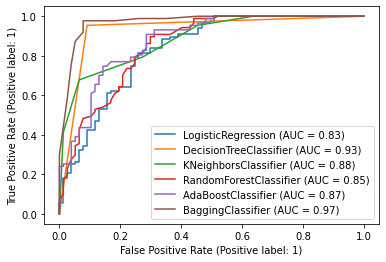

In [796]:
disp = plot_roc_curve(log_reg, x_test, y_test)
plot_roc_curve(d_tree, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rand_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada_class,x_test,y_test,ax=disp.ax_)
plot_roc_curve(beg_class,x_test,y_test,ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

# Saving Modal

In [799]:
import joblib
joblib.dump(rand_class,'loan_applicatin.pkl')

['loan_applicatin.pkl']